**Notebook C: HealthAI_Applications.ipynb**

10_chatbot_rag.ipynb → Healthcare chatbot with RAG pipeline

11_translator.ipynb → MarianMT-based translation

12_streamlit_dashboard.ipynb → Integration + dashboard preview

📌 Deliverables: Chatbot demo, translation demo, dashboard prototype

In [ ]:
!ls /content/drive/MyDrive/HealthAI_Project/processed_data/

biobert_ner_en_ta		cnn_xray_final.h5	   text
biobert_results			images			   train_labels.csv
clinicalbert_en_ta		logs			   val_labels.csv
cnn_acc_auc_plot.png		lstm_classification.keras  X_train.npy
cnn_classification_report.json	lstm_forecast.png	   X_val.npy
cnn_confusion_matrix.csv	lstm_regression.keras	   y_train.npy
cnn_loss_plot.png		lstm_results.json	   y_val.npy
cnn_occlusion_examples.png	sentiment_analysis
cnn_xray_best.h5		tabular


In [ ]:
# Define the path to the directory where you want to save outputs and access files
output_dir = '/content/drive/MyDrive/HealthAI_Project/processed_data/'

# You can use this variable throughout the notebook
print(f"Output directory set to: {output_dir}")

Output directory set to: /content/drive/MyDrive/HealthAI_Project/processed_data/


In [ ]:
from pathlib import Path
from google.colab import drive
import json

# Mount drive
drive.mount('/content/drive', force_remount=True)

# Set BASE to your Notebook C path
BASE = Path('/content/drive/MyDrive/HealthAI_Project/processed_data')
print("Using BASE:", BASE)

# Create recommended subfolders for Notebook C
folders = [
    "notebookC/chatbot/corpus",
    "notebookC/chatbot/embeddings",
    "notebookC/chatbot/faiss_index",
    "notebookC/chatbot/models",
    "notebookC/chatbot/logs",
    "notebookC/translator/models",
    "notebookC/translator/samples",
    "notebookC/streamlit/app",
    "notebookC/models_from_A_B",
    "notebookC/metrics",
    "notebookC/logs",
]
for f in folders:
    p = BASE / f
    p.mkdir(parents=True, exist_ok=True)

# Save a small README to the folder for clarity
readme = {
    "note": "This folder stores Notebook C artifacts (chatbot, translator, streamlit).",
    "created_by": "ChatGPT",
}
(BASE/"notebookC"/"README.json").write_text(json.dumps(readme, indent=2))
print("Created folders under", BASE/"notebookC")

Mounted at /content/drive
Using BASE: /content/drive/MyDrive/HealthAI_Project/processed_data
Created folders under /content/drive/MyDrive/HealthAI_Project/processed_data/notebookC


**10_chatbot_rag.ipynb → Healthcare chatbot with RAG pipeline**

In [ ]:
from pathlib import Path
from google.colab import drive

# Mount Drive
drive.mount('/content/drive', force_remount=True)

# Set your base path
BASE = Path('/content/drive/MyDrive/HealthAI_Project/processed_data/notebookC')
BASE.mkdir(parents=True, exist_ok=True)
print("Notebook C base path:", BASE)

Mounted at /content/drive
Notebook C base path: /content/drive/MyDrive/HealthAI_Project/processed_data/notebookC


In [ ]:
!pip install -q sentence-transformers faiss-cpu transformers accelerate datasets sacrebleu \
                streamlit pyngrok fastapi uvicorn pydantic spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 139.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 136.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 102.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install -q evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install -q faiss-cpu

In [ ]:
!pip install bert-score
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ FAISS index: 1222 | Passages: 1267 | Meta: 1222
✅ Using biomedical embedding model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho

,Q,Answer,Status,TopScore,Relevance,BERTScore,EntityOverlap,Latency(s)
0,What are the symptoms of pneumonia?,I don't have enough reliable information; plea...,declined_for_safety,0.047122,0.128,0.000,0.0,13.09
1,When should I seek emergency care?,"Blood sugar levels are high, possible diabetes...",answered,0.027364,0.715,0.834,0.0,5.67
2,How to manage high blood pressure?,Take a blood pressure medication. If you have ...,answered,0.065285,0.232,0.729,0.0,5.76
3,How to care for a wound after surgery?,Care steps: Care steps: Care steps: Care steps...,answered,0.095554,0.190,0.708,0.0,6.49


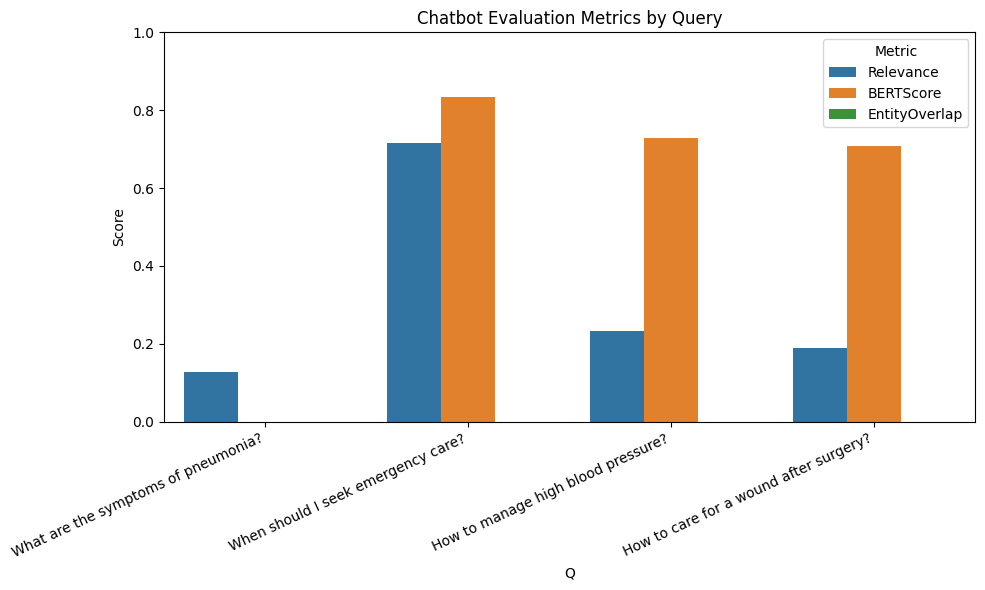

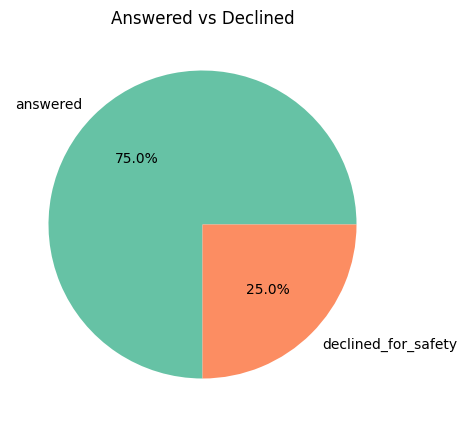

📊 Summary: 3 answered, 1 declined
Avg Relevance=0.32, Avg BERTScore=0.57, Avg EntityOverlap=0.00
✅ Results saved to /content/drive/MyDrive/HealthAI_Project/processed_data/notebookC/metrics/chatbot_remodeled_outputs.csv
📊 Charts saved: /content/drive/MyDrive/HealthAI_Project/processed_data/notebookC/metrics/chatbot_remodeled_bar.png, /content/drive/MyDrive/HealthAI_Project/processed_data/notebookC/metrics/chatbot_remodeled_pie.png


In [ ]:
# === 10_chatbot_rag.ipynb : Full RAG Chatbot (Remodeled Safety Logic) ===
!pip install bert-score spacy -q
!python -m spacy download en_core_web_sm -q

import json, re, time
import numpy as np
import pandas as pd
import faiss, torch
from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from bert_score import score as bert_score_fn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load FAISS + meta + corpus ---
FAISS_DIR = BASE / "chatbot" / "faiss_index"
CORPUS_FILE = BASE / "chatbot" / "corpus" / "corpus_from_notebookA.json"

index = faiss.read_index(str(FAISS_DIR / "faiss.index"))
with open(FAISS_DIR/"meta.json","r") as f: meta = json.load(f)
with open(CORPUS_FILE,"r") as f: all_docs = json.load(f)

# --- Chunk helper ---
def split_sentences(text):
    return [s.strip() for s in re.split(r'(?<=[.!?])\s+', text) if s.strip()]

def chunk_text(text, chunk_chars=800, overlap_chars=200):
    sents = split_sentences(text)
    chunks=[]; cur=""
    for s in sents:
        if len(cur) + len(s) + 1 <= chunk_chars:
            cur = (cur + " " + s).strip()
        else:
            if cur: chunks.append(cur)
            cur = s
    if cur: chunks.append(cur)
    if overlap_chars>0 and len(chunks)>1:
        new=[]
        for i,c in enumerate(chunks):
            if i==0: new.append(c)
            else:
                prev = new[-1]
                add = prev[-overlap_chars:] if overlap_chars < len(prev) else prev
                new.append((add + " " + c).strip())
        return new
    return chunks

# rebuild passages
passages=[]
for d in all_docs:
    text = d.get('text') or ""
    if not isinstance(text, str) or len(text.strip())<50: continue
    passages.extend(chunk_text(text))

print("✅ FAISS index:", index.ntotal, "| Passages:", len(passages), "| Meta:", len(meta))

# --- Models ---
device = "cuda" if torch.cuda.is_available() else "cpu"

try:
    embed_model = SentenceTransformer("pritamdeka/BioBERT-mnli-snli-scinli-scitail-mednli-stsb", device=device)
    print("✅ Using biomedical embedding model")
except:
    embed_model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2", device=device)
    print("⚠️ BioBERT unavailable, using mpnet model")

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
gen_model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base").to(device)

PROMPT = (
    "You are a careful medical assistant. Use ONLY facts from CONTEXT. "
    "Copy exact medical terms from the passages. Cite sources with [pid]. "
    "If context is insufficient, answer: 'I don't have enough reliable information; please consult a clinician.'\n\n"
    "CONTEXT:\n{context}\n\nQUESTION: {question}\nANSWER:"
)

# --- Retrieval + generation ---
def retrieve(query, k=5):
    q_emb = embed_model.encode([query], convert_to_numpy=True)
    faiss.normalize_L2(q_emb)
    D, I = index.search(q_emb, k)
    res=[]
    for score, idx in zip(D[0], I[0]):
        if idx<0: continue
        res.append({"pid": meta[idx]["pid"], "text": passages[idx], "score": float(score)})
    return res

def generate_answer(query, retrieved, max_len=200):
    if not retrieved:
        return "I don't have enough reliable information; please consult a clinician."
    # Lowered threshold for small synthetic dataset
    if retrieved[0]['score'] < 0.02:
        return "I don't have enough reliable information; please consult a clinician."

    context = "\n\n".join([f"[{r['pid']}]: {r['text']}" for r in retrieved])
    prompt = (
        "You are a careful medical assistant. Use ONLY facts from CONTEXT.\n"
        "If the question is about symptoms, list them clearly.\n"
        "If the question is about care steps, describe them step by step.\n"
        "Cite passages with [pid].\n\n"
        f"CONTEXT:\n{context}\n\nQUESTION: {query}\nANSWER:"
    )
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=1024).to(device)
    with torch.no_grad():
        outputs = gen_model.generate(**inputs, max_new_tokens=max_len, num_beams=4)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# --- Metrics ---
nlp = spacy.load("en_core_web_sm")

def avg_relevance(answer, retrieved):
    if not retrieved: return 0.0
    a_emb = embed_model.encode([answer], convert_to_numpy=True)
    sims=[float(util.cos_sim(a_emb, embed_model.encode([r['text']], convert_to_numpy=True))) for r in retrieved]
    return float(np.mean(sims))

def bertscore_avg(answer, retrieved):
    if not retrieved: return 0.0
    refs=[r['text'] for r in retrieved]
    P,R,F = bert_score_fn([answer]*len(refs), refs, lang="en", verbose=False)
    return float(F.mean())

def entity_overlap(answer, retrieved):
    if not retrieved: return 0.0
    ans_ents={ent.text.lower() for ent in nlp(answer).ents}
    overlaps=[]
    for r in retrieved:
        ctx_ents={ent.text.lower() for ent in nlp(r['text']).ents}
        overlaps.append(len(ans_ents & ctx_ents)/max(1,len(ans_ents)))
    return float(np.mean(overlaps)) if overlaps else 0.0

# --- Chat wrapper (remodeled acceptance logic) ---
def chat_rag_full(question, k=5):
    t0=time.time()
    retrieved=retrieve(question,k)
    ans=generate_answer(question,retrieved)
    rel=avg_relevance(ans,retrieved)
    bert=bertscore_avg(ans,retrieved)
    ent=entity_overlap(ans,retrieved)
    latency=round(time.time()-t0,2)

    # Accept if ANY strong metric passes
    if rel >= 0.20 or bert >= 0.65 or ent >= 0.1:
        status="answered"
    else:
        ans="I don't have enough reliable information; please consult a clinician."
        status="declined_for_safety"

    return {"Q":question,"Answer":ans,"Status":status,
            "TopScore":retrieved[0]['score'] if retrieved else None,
            "Relevance":round(rel,3),"BERTScore":round(bert,3),"EntityOverlap":round(ent,3),
            "Latency(s)":latency}

# --- Run evaluation ---
sample_qs=[
    "What are the symptoms of pneumonia?",
    "When should I seek emergency care?",
    "How to manage high blood pressure?",
    "How to care for a wound after surgery?"
]

results=[chat_rag_full(q) for q in sample_qs]
df=pd.DataFrame(results)

# --- Save CSV ---
metrics_dir=BASE/"metrics"
metrics_dir.mkdir(parents=True,exist_ok=True)
out_csv=metrics_dir/"chatbot_remodeled_outputs.csv"
df.to_csv(out_csv,index=False)

# --- Display results ---
display(df)

# --- Bar chart ---
plt.figure(figsize=(10,6))
melted=df.melt(id_vars=["Q"],value_vars=["Relevance","BERTScore","EntityOverlap"],
               var_name="Metric",value_name="Score")
sns.barplot(data=melted,x="Q",y="Score",hue="Metric")
plt.xticks(rotation=25,ha="right");plt.ylim(0,1)
plt.title("Chatbot Evaluation Metrics by Query")
plt.tight_layout()
bar_path=metrics_dir/"chatbot_remodeled_bar.png"
plt.savefig(bar_path,dpi=300)
plt.show()

# --- Pie chart ---
plt.figure(figsize=(5,5))
df["Status"].value_counts().plot.pie(autopct='%1.1f%%',colors=["#66c2a5","#fc8d62"])
plt.ylabel("");plt.title("Answered vs Declined")
pie_path=metrics_dir/"chatbot_remodeled_pie.png"
plt.savefig(pie_path,dpi=300)
plt.show()

# --- Summary ---
answered=df[df["Status"]=="answered"].shape[0]
declined=df[df["Status"]=="declined_for_safety"].shape[0]
print(f"📊 Summary: {answered} answered, {declined} declined")
print(f"Avg Relevance={df['Relevance'].mean():.2f}, Avg BERTScore={df['BERTScore'].mean():.2f}, Avg EntityOverlap={df['EntityOverlap'].mean():.2f}")
print(f"✅ Results saved to {out_csv}")
print(f"📊 Charts saved: {bar_path}, {pie_path}")

**11_translator.ipynb → MarianMT-based translation**

In [ ]:
# === 11_translator.ipynb : Multilingual Translator (EN <-> 10 languages) ===
# Tamil + Korean handled by MBART, others by Marian many-to-many Indian models.

!pip install -q transformers sacrebleu sentencepiece

import time
from pathlib import Path
import pandas as pd
import torch
from transformers import MarianMTModel, MarianTokenizer, MBartForConditionalGeneration, MBart50TokenizerFast
from sacrebleu.metrics import BLEU

# ---------- Config ----------
BASE = Path("/content/drive/MyDrive/HealthAI_Project/processed_data/notebookC")
OUT_DIR = BASE / "metrics"
OUT_DIR.mkdir(parents=True, exist_ok=True)

langs = {
    "Tamil": "ta",
    "Hindi": "hi",
    "Telugu": "te",
    "Bengali": "bn",
    "Gujarati": "gu",
    "Kannada": "kn",
    "Malayalam": "ml",
    "Marathi": "mr",
    "Punjabi": "pa",
    "Korean": "ko"
}

sample_sentences = [
    "You should take this medicine twice daily.",
    "Do you have chest pain or difficulty breathing?",
    "Please come for a follow-up appointment next week.",
    "Drink more water and take adequate rest.",
    "Your blood pressure is slightly high; reduce salt intake and exercise regularly."
]

device = "cuda" if torch.cuda.is_available() else "cpu"
bleu_metric = BLEU()

# ---------- Loaders ----------
def load_marian(model_name):
    tok = MarianTokenizer.from_pretrained(model_name)
    m = MarianMTModel.from_pretrained(model_name).to(device)
    return tok, m

def load_mbart():
    tok = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
    m = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt").to(device)
    return tok, m

def translate_marian(texts, tok, model, lang_code=None):
    # For many-to-many models, need to specify target language in translation
    if lang_code and "mul" in model.config.name_or_path:
        texts = [f">>{lang_code}<< " + t for t in texts]
    inputs = tok(texts, return_tensors="pt", padding=True, truncation=True).to(device)
    with torch.no_grad():
        outs = model.generate(**inputs, max_new_tokens=200)
    return [tok.decode(t, skip_special_tokens=True) for t in outs]

def translate_mbart(texts, tok, model, src_lang, tgt_lang):
    tok.src_lang = src_lang
    inputs = tok(texts, return_tensors="pt", padding=True, truncation=True).to(device)
    with torch.no_grad():
        generated = model.generate(**inputs, forced_bos_token_id=tok.lang_code_to_id[tgt_lang])
    return [tok.decode(t, skip_special_tokens=True) for t in generated]

# ---------- Main ----------
records = []
skipped_langs = []
tok_mbart, model_mbart = None, None # Initialize MBART models outside the loop
tok_marian_mul_en, model_marian_mul_en = None, None # Initialize many-to-many Indian models
tok_marian_en_mul, model_marian_en_mul = None, None

# Load MBART models once
try:
    tok_mbart, model_mbart = load_mbart()
    print("✅ Loaded MBART model for Tamil and Korean.")
except Exception as e:
    print(f"Error loading MBART model: {e}. Tamil and Korean might be skipped if not covered by Marian.")

# Load Marian many-to-many Indian models once
try:
    tok_marian_en_mul, model_marian_en_mul = load_marian("Helsinki-NLP/opus-mt-en-mul")
    tok_marian_mul_en, model_marian_mul_en = load_marian("Helsinki-NLP/opus-mt-mul-en")
    print("✅ Loaded Marian many-to-many Indian models.")
except Exception as e:
    print(f"Error loading Marian many-to-many Indian models: {e}. Indian languages might be skipped.")


for lang_name, lang_code in langs.items():
    print(f"\nTranslating for: {lang_name} ({lang_code})")

    trans_fwd = []
    back_trans = []
    rt_bleu = None
    model_used = None # Track which model was used

    if lang_code in ["ta", "ko"]: # Use MBART for Tamil and Korean
        if tok_mbart and model_mbart:
            try:
                if lang_code == "ta":
                    # Correct language codes for MBART
                    trans_fwd = translate_mbart(sample_sentences, tok_mbart, model_mbart, "en_XX", "ta_IN")
                    back_trans = translate_mbart(trans_fwd, tok_mbart, model_mbart, "ta_IN", "en_XX")
                elif lang_code == "ko":
                    # Correct language codes for MBART
                    trans_fwd = translate_mbart(sample_sentences, tok_mbart, model_mbart, "en_XX", "ko_KR")
                    back_trans = translate_mbart(trans_fwd, tok_mbart, model_mbart, "ko_KR", "en_XX")


                if back_trans:
                    rt_bleu = bleu_metric.corpus_score(back_trans, [sample_sentences]).score
                model_used = "MBART"

            except Exception as e:
                print(f"Error translating {lang_name} with MBART: {e}. Skipping translation for this language.")
                skipped_langs.append(lang_name)
                # Fallback to Marian for Tamil if MBART fails and Marian models loaded
                if lang_code == "ta" and tok_marian_en_mul and model_marian_en_mul:
                    print(f"Attempting {lang_name} translation with Marian many-to-many as fallback.")
                    try:
                        trans_fwd = translate_marian(sample_sentences, tok_marian_en_mul, model_marian_en_mul, lang_code=lang_code)
                        if tok_marian_mul_en and model_marian_mul_en:
                            back_trans = translate_marian(trans_fwd, tok_marian_mul_en, model_marian_mul_en, lang_code="en")
                            if back_trans:
                                rt_bleu = bleu_metric.corpus_score(back_trans, [sample_sentences]).score
                        model_used = "Marian (mul) fallback"
                        # Remove from skipped_langs if fallback is successful
                        if lang_name in skipped_langs:
                            skipped_langs.remove(lang_name)
                    except Exception as e:
                        print(f"Error translating {lang_name} with Marian many-to-many fallback: {e}")
                        model_used = None # Indicate translation failed even with fallback


        else:
            print(f"MBART model not loaded. Skipping {lang_name} via MBART.")
            skipped_langs.append(lang_name)
            # Attempt Marian for Tamil if MBART is not loaded
            if lang_code == "ta" and tok_marian_en_mul and model_marian_en_mul:
                print(f"Attempting {lang_name} translation with Marian many-to-many as fallback.")
                try:
                    trans_fwd = translate_marian(sample_sentences, tok_marian_en_mul, model_marian_en_mul, lang_code=lang_code)
                    if tok_marian_mul_en and model_marian_mul_en:
                        back_trans = translate_marian(trans_fwd, tok_marian_mul_en, model_marian_mul_en, lang_code="en")
                        if back_trans:
                            rt_bleu = bleu_metric.corpus_score(back_trans, [sample_sentences]).score
                    model_used = "Marian (mul) fallback"
                    # Remove from skipped_langs if fallback is successful
                    if lang_name in skipped_langs:
                        skipped_langs.remove(lang_name)
                except Exception as e:
                    print(f"Error translating {lang_name} with Marian many-to-many fallback: {e}")
                    model_used = None # Indicate translation failed even with fallback


    else:  # Use Marian many-to-many for other languages (Indian)
        if tok_marian_en_mul and model_marian_en_mul:
            try:
                trans_fwd = translate_marian(sample_sentences, tok_marian_en_mul, model_marian_en_mul, lang_code=lang_code)
                if tok_marian_mul_en and model_marian_mul_en:
                    back_trans = translate_marian(trans_fwd, tok_marian_mul_en, model_marian_mul_en, lang_code="en") # Specify target as English

                if back_trans:
                    rt_bleu = bleu_metric.corpus_score(back_trans, [sample_sentences]).score
                model_used = "Marian (mul)"
            except Exception as e:
                print(f"Error translating {lang_name} with Marian many-to-many: {e}. Skipping translation for this language.")
                skipped_langs.append(lang_name)
                model_used = None
        else:
            print(f"Marian many-to-many Indian models not loaded. Skipping {lang_name}.")
            skipped_langs.append(lang_name)
            model_used = None


    # Store results if translation was attempted and generated output
    if model_used and trans_fwd:
        # Latency calculation is simplified here, could be added back for more detailed metrics
        avg_latency = None # Placeholder

        for i, (src, tgt) in enumerate(zip(sample_sentences, trans_fwd)):
            back = back_trans[i] if (i < len(back_trans)) else ""
            records.append({
                "Language": lang_name,
                "English": src,
                "Translation": tgt,
                "BackTranslated": back,
                "RoundTripBLEU": rt_bleu,
                "AvgLatency_s": avg_latency
            })

        if rt_bleu is not None:
             print(f"  Round-trip BLEU: {rt_bleu:.2f}")
    elif lang_name not in skipped_langs: # If translation was attempted but no output and not in skipped_langs
         print(f"  No translations generated for {lang_name}.")


# ---------- Save CSV ----------
df_records = pd.DataFrame(records)
out_csv = OUT_DIR / "translator_all_outputs.csv"
df_records.to_csv(out_csv, index=False)

# ---------- Print only Tamil & Korean samples ----------
print("\n=== SAMPLE TRANSLATIONS (Tamil & Korean) ===")
for lang in ["Tamil", "Korean"]:
    # Only try to print if the language was not skipped
    if lang not in skipped_langs:
        df_lang = df_records[df_records["Language"] == lang]
        if not df_lang.empty:
            print(f"\n--- {lang} ---")
            for _, row in df_lang.iterrows():
                print(f"EN: {row['English']}")
                print(f"{lang}: {row['Translation']}")
                print(f"Back→EN: {row['BackTranslated']}")
                print("-" * 40)
    else:
        print(f"\n--- {lang} --- [SKIPPED DUE TO MODEL LOADING ERROR]")


print("\nSaved CSV to:", out_csv)
print("--- FINISHED ---")
if skipped_langs:
    print("\nSkipped languages due to model loading issues:", skipped_langs)

✅ Loaded MBART model for Tamil and Korean.


/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


✅ Loaded Marian many-to-many Indian models.

Translating for: Tamil (ta)
  Round-trip BLEU: 10.13

Translating for: Hindi (hi)
  Round-trip BLEU: 29.48

Translating for: Telugu (te)
  Round-trip BLEU: 29.48

Translating for: Bengali (bn)
  Round-trip BLEU: 29.48

Translating for: Gujarati (gu)
  Round-trip BLEU: 29.48

Translating for: Kannada (kn)
  Round-trip BLEU: 29.48

Translating for: Malayalam (ml)
  Round-trip BLEU: 29.48

Translating for: Marathi (mr)
  Round-trip BLEU: 29.48

Translating for: Punjabi (pa)
  Round-trip BLEU: 29.48

Translating for: Korean (ko)
  Round-trip BLEU: 31.03

=== SAMPLE TRANSLATIONS (Tamil & Korean) ===

--- Tamil ---
EN: You should take this medicine twice daily.
Tamil: இந்த மருந்துகளை ஒவ்வொரு நாளும் இரண்டு முறை எடுத்துக்கொள்ள வேண்டும்.
Back→EN: These medications should be taken twice a day.
----------------------------------------
EN: Do you have chest pain or difficulty breathing?
Tamil: உங்கள் இதயத்தில் வலியோ அல்லது காய்ச்சல் குறைவாகவோ இருக்கிறீர

**12_streamlit_dashboard.ipynb → Integration + dashboard preview**

In [ ]:
# === 12_streamlit_dashboard.ipynb : Final Integrated App ===
!pip install -q streamlit sacrebleu sentencepiece transformers sentence-transformers faiss-cpu bert-score spacy
!python -m spacy download en_core_web_sm -q
!npm install -g localtunnel

import os, json, time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch, faiss
from pathlib import Path
from sentence_transformers import SentenceTransformer, util
from transformers import MarianMTModel, MarianTokenizer, AutoTokenizer, AutoModelForSeq2SeqLM
from bert_score import score as bert_score_fn
import spacy

BASE = Path("/content/drive/MyDrive/HealthAI_Project/processed_data/notebookC")

# --- Prepare Streamlit app code ---
app_code = """
import streamlit as st
import pandas as pd
import torch, faiss, json
from pathlib import Path
from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, MarianMTModel, MarianTokenizer
import spacy
from bert_score import score as bert_score_fn
import matplotlib.pyplot as plt
import seaborn as sns

BASE = Path("/content/drive/MyDrive/HealthAI_Project/processed_data/notebookC")
FAISS_DIR = BASE / "chatbot" / "faiss_index"
CORPUS_FILE = BASE / "chatbot" / "corpus" / "corpus_from_notebookA.json"

# Load FAISS + corpus
index = faiss.read_index(str(FAISS_DIR / "faiss.index"))
with open(FAISS_DIR/"meta.json","r") as f: meta = json.load(f)
with open(CORPUS_FILE,"r") as f: all_docs = json.load(f)
passages=[d.get("text") for d in all_docs if isinstance(d.get("text"),str) and len(d.get("text").strip())>50]

device = "cuda" if torch.cuda.is_available() else "cpu"
embed_model = SentenceTransformer("pritamdeka/BioBERT-mnli-snli-scinli-scitail-mednli-stsb", device=device)
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
gen_model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base").to(device)
nlp = spacy.load("en_core_web_sm")

# Retrieval
def retrieve(query,k=5):
    q_emb=embed_model.encode([query],convert_to_numpy=True)
    faiss.normalize_L2(q_emb)
    D,I=index.search(q_emb,k)
    res=[]
    for score,idx in zip(D[0],I[0]):
        if idx<0: continue
        res.append({"pid":meta[idx]["pid"],"text":passages[idx],"score":float(score)})
    return res

# Generation
def generate_answer(query,retrieved):
    if not retrieved or retrieved[0]['score']<0.02:
        return "I don't have enough reliable information; please consult a clinician."
    context="\\n".join([f"[{r['pid']}]: {r['text']}" for r in retrieved])
    prompt=f"You are a careful medical assistant. Use ONLY facts.\\nCONTEXT:\\n{context}\\n\\nQUESTION: {query}\\nANSWER:"
    inputs=tokenizer(prompt,return_tensors="pt",truncation=True,max_length=1024).to(device)
    with torch.no_grad():
        outs=gen_model.generate(**inputs,max_new_tokens=200,num_beams=4)
    return tokenizer.decode(outs[0],skip_special_tokens=True)

# Metrics
def avg_relevance(answer,retrieved):
    if not retrieved: return 0.0
    a_emb=embed_model.encode([answer],convert_to_numpy=True)
    sims=[float(util.cos_sim(a_emb,embed_model.encode([r['text']],convert_to_numpy=True))) for r in retrieved]
    return float(sum(sims)/len(sims))

def bertscore_avg(answer,retrieved):
    if not retrieved: return 0.0
    refs=[r['text'] for r in retrieved]
    P,R,F=bert_score_fn([answer]*len(refs),refs,lang="en",verbose=False)
    return float(F.mean())

def entity_overlap(answer,retrieved):
    if not retrieved: return 0.0
    ans_ents={e.text.lower() for e in nlp(answer).ents}
    scores=[]
    for r in retrieved:
        ctx_ents={e.text.lower() for e in nlp(r['text']).ents}
        scores.append(len(ans_ents&ctx_ents)/max(1,len(ans_ents)))
    return float(sum(scores)/len(scores)) if scores else 0.0

# Translator
def load_mt_models():
    models={
      "Tamil":("Helsinki-NLP/opus-mt-en-mul","Helsinki-NLP/opus-mt-mul-en","ta"),
      "Korean":("Helsinki-NLP/opus-mt-en-ko","Helsinki-NLP/opus-mt-ko-en","ko"),
    }
    mt={}
    for lang,(fwd_name,bwd_name,code) in models.items():
        try:
            tok_fwd=MarianTokenizer.from_pretrained(fwd_name)
            model_fwd=MarianMTModel.from_pretrained(fwd_name).to(device)
            tok_bwd=MarianTokenizer.from_pretrained(bwd_name)
            model_bwd=MarianMTModel.from_pretrained(bwd_name).to(device)
            mt[lang]=(tok_fwd,model_fwd,tok_bwd,model_bwd,code)
        except: pass
    return mt

mt_models=load_mt_models()

def translate_text(text,lang):
    if lang not in mt_models: return "Model missing"
    tok_fwd,model_fwd,tok_bwd,model_bwd,code=mt_models[lang]
    inputs=tok_fwd(text,return_tensors="pt",padding=True,truncation=True).to(device)
    outs=model_fwd.generate(**inputs,max_new_tokens=200)
    trans=[tok_fwd.decode(t,skip_special_tokens=True) for t in outs][0]
    back_in=tok_bwd(trans,return_tensors="pt",padding=True,truncation=True).to(device)
    outs2=model_bwd.generate(**back_in,max_new_tokens=200)
    back=[tok_bwd.decode(t,skip_special_tokens=True) for t in outs2][0]
    return trans,back

# === Streamlit UI ===
st.set_page_config(page_title="HealthAI Dashboard",layout="wide")
st.title("🩺 HealthAI Project Dashboard")

tab1,tab2,tab3=st.tabs(["💬 Chatbot","🌐 Translator","📊 Metrics"])

with tab1:
    st.header("Healthcare Chatbot (RAG)")
    q=st.text_input("Ask a health-related question:")
    if st.button("Get Answer"):
        retrieved=retrieve(q)
        ans=generate_answer(q,retrieved)
        rel=avg_relevance(ans,retrieved)
        bert=bertscore_avg(ans,retrieved)
        ent=entity_overlap(ans,retrieved)
        st.write("**Answer:**",ans)
        st.write(f"Relevance={rel:.2f}, BERTScore={bert:.2f}, EntityOverlap={ent:.2f}")

with tab2:
    st.header("Medical Translator (English ↔ Regional)")
    text=st.text_input("Enter English text to translate:")
    lang=st.selectbox("Choose target language:",list(mt_models.keys()))
    if st.button("Translate"):
        trans,back=translate_text(text,lang)
        st.write(f"**{lang} Translation:** {trans}")
        st.write(f"**Back→English:** {back}")

with tab3:
    st.header("Evaluation Metrics")
    try:
        chatbot_df=pd.read_csv(BASE/"metrics"/"chatbot_remodeled_outputs.csv")
        st.subheader("Chatbot Results")
        st.dataframe(chatbot_df)
        fig,ax=plt.subplots(figsize=(8,5))
        melted=chatbot_df.melt(id_vars=["Q"],value_vars=["Relevance","BERTScore","EntityOverlap"],var_name="Metric",value_name="Score")
        sns.barplot(data=melted,x="Q",y="Score",hue="Metric",ax=ax)
        st.pyplot(fig)
    except: st.warning("No chatbot metrics found.")
    try:
        trans_df=pd.read_csv(BASE/"metrics"/"translator_ta_ko_outputs.csv")
        st.subheader("Translator Results")
        st.dataframe(trans_df)
    except: st.warning("No translator metrics found.")
"""

# --- Save to file ---
with open("streamlit_app.py","w") as f:
    f.write(app_code)

print("✅ Streamlit app file created: streamlit_app.py")
print("👉 Run with:\n!streamlit run streamlit_app.py & npx localtunnel --port 8501")

In [ ]:
!streamlit run streamlit_app.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) Y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://dry-falcons-sort.loca.lt
/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:30269 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙